In [27]:
import numpy as np  #utilizada para tratar vetores e matrizes
 
import pandas as pd  #utilizada para tratar dataframes
 
import matplotlib as mpl  #utilizada para tratar gráficos
import matplotlib.pyplot as plt
 
from sklearn import preprocessing  #utilizada para realizar o preprocessamento dos dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # função utilizada para dividir do dataset entre treinamento e test
from sklearn.metrics import classification_report, confusion_matrix  #metrica de desempenho para o sklearn

In [2]:
# Realiza o download do dataset a ser utilizado.
data = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
# Quantos tipos diferentes de dados existem no dataset do desafio?
data.shape

(1599, 12)

In [9]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [111]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1) 

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

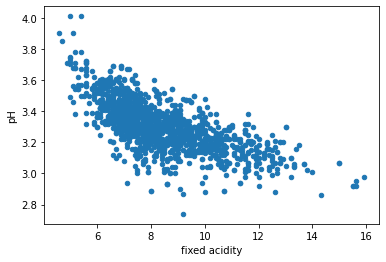

In [12]:
# Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".
data.plot.scatter(x='fixed acidity',y='pH',colormap='viridis') 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

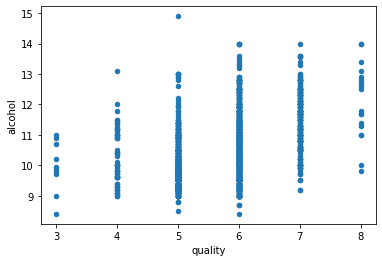

In [13]:
# Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:
# Não existe correlação
data.plot.scatter(x='quality',y='alcohol',colormap='viridis') 

In [15]:
# Quantas instâncias existem para a qualidade do vinho igual a 5?
data[data['quality'] == 5].shape

(681, 12)

In [17]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [31]:
# define min max scaler
scaler = MinMaxScaler()
entradas_normalizadas = pd.DataFrame(scaler.fit_transform(data.iloc[:,0:11]))
entradas_normalizadas.columns = list(data.iloc[:,0:11].columns)
entradas_normalizadas['quality'] = data['quality'] #coloca os valores bpara a saída (diagnóstico) no "novo" dataframe

In [74]:
entradas_normalizadas.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
entradas_normalizadas.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846        5  
1  0.215385        5  
2  0.215385        5  
3  0.215385        6  
4  0.153846        5

In [33]:
entradas_normalizadas.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        0.329171          0.279329     0.270976        0.112247   
std         0.154079          0.122644     0.194801        0.096570   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.184932     0.090000        0.068493   
50%         0.292035          0.273973     0.260000        0.089041   
75%         0.407080          0.356164     0.420000        0.116438   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.125988             0.209506              0.142996     0.490211   
std       0.078573             0.147326              0.116238     0.138571   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.096828             0.084507              0.056537     0.406021   
50%       0.111853             0.183099              0.113074     0.490455   
75%       0.130217             0.281690              0.197880     0.570117   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      0.449695     0.196496     0.311228     5.636023  
std       0.121564     0.101501     0.163949     0.807569  
min       0.000000     0.000000     0.000000     3.000000  
25%       0.370079     0.131737     0.169231     5.000000  
50%       0.448819     0.173653     0.276923     6.000000  
75%       0.519685     0.239521     0.415385     6.000000  
max       1.000000     1.000000     1.000000     8.000000

In [36]:
# Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurácia para o KNN?
data_in = data_n2.drop('quality',axis=1)  # seleciona os valores para serem utilizados como entrada do dataframe
X = data_in.values  # cria o vetor de entrada 

#divide o conjunto de dados entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, entradas_normalizadas['quality'], test_size=0.3, random_state=1)

In [41]:
#aplicando o kNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [42]:
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [62]:
!pip install mlxtend

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
You should consider upgrading via the '/home/jlima/anaconda/envs/udacity-ai-env/bin/python -m pip install --upgrade pip' command.


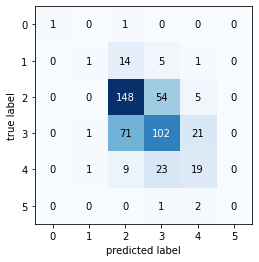

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480



/home/jlima/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

mtx_confusion_knn = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = mtx_confusion_knn)
plt.show()

print(classification_report(y_test, y_pred))

In [45]:
# Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do 
# desafio e a divisão de treinamento e teste, como mostrado anteriormente, qual é o valor da acurácia?
from sklearn.tree import DecisionTreeClassifier

In [50]:
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
y_pred_tree = classifier_tree.predict(X_test)

In [52]:
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[  0   0   0   2   0   0]
 [  2   2  11   4   2   0]
 [  1   8 141  44  13   0]
 [  1   3  68 104  18   1]
 [  0   0   4  14  32   2]
 [  0   0   0   0   2   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.10      0.12        21
           5       0.63      0.68      0.65       207
           6       0.62      0.53      0.57       195
           7       0.48      0.62      0.54        52
           8       0.25      0.33      0.29         3

    accuracy                           0.58       480
   macro avg       0.35      0.38      0.36       480
weighted avg       0.58      0.58      0.58       480



In [67]:
!pip install pydotplus

  Using cached pydotplus-2.0.2-py3-none-any.whl


In [68]:
# Visualizando a arvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [78]:
entradas_normalizadas.iloc[:,0:11].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [81]:
dot_data = StringIO()
export_graphviz(classifier_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = entradas_normalizadas.iloc[:,0:11].columns, 
                class_names = ['5', '6', '7', '4', '8', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())

In [55]:
# Aplicando o algoritmo de floresta randômica com os mesmos parâmetros apresentados no 
# enunciado e mesmos valores para o treinamento e teste, qual é o valor mais próximo para a acurácia?
from sklearn.ensemble import RandomForestClassifier

In [56]:
classifier_forest = RandomForestClassifier(max_depth=10, random_state=1)
classifier_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [58]:
y_pred_forest = classifier_forest.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[[  0   0   2   0   0   0]
 [  0   0  14   7   0   0]
 [  0   0 167  38   2   0]
 [  0   0  46 136  13   0]
 [  0   0   5  24  23   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.70      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.66       480



/home/jlima/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
# Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores
# para treinamento e teste, qual é o valor mais próximo para a acurácia obtido?
from sklearn.svm import SVC
classifier_svm = SVC(gamma='auto',kernel='rbf')

In [85]:
# Realiza a classificação via SVM
classifier_svm.fit(X_train, y_train)

# Realiza a previsão de classificação com o conjunto de testes
y_pred_svm = classifier_svm.predict(X_test)

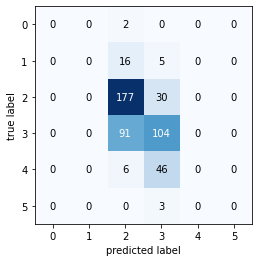

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.61      0.86      0.71       207
           6       0.55      0.53      0.54       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.49      0.59      0.53       480



/home/jlima/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# avaliando o modelo
mtx_confusion_svm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plot_confusion_matrix(conf_mat = mtx_confusion_svm)
plt.show()

print(classification_report(y_test, y_pred_svm))

In [88]:
# Aplicando a rede MLP, como mostrado no enunciado, e com os mesmos dados de treinamento 
# e teste utilizados, qual é o valor mais próximo para a acurácia do modelo?
from sklearn.neural_network import MLPClassifier

# Configurando a rede
classifier_mlp = MLPClassifier(alpha = 1e-5, hidden_layer_sizes = (5, 5), random_state = 1)

In [89]:
# Realiza o fit do modelo
classifier_mlp.fit(X_train, y_train)

# Realiza previsoes na base de teste
y_pred_mlp = classifier_mlp.predict(X_test)

/home/jlima/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


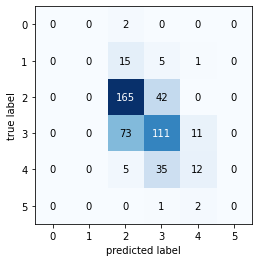

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.80      0.71       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.56      0.60      0.57       480



/home/jlima/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# avaliando o modelo
mtx_confusion_mlp = confusion_matrix(y_test, y_pred_mlp)
fig, ax = plot_confusion_matrix(conf_mat = mtx_confusion_mlp)
plt.show()

print(classification_report(y_test, y_pred_mlp))

In [100]:
# Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) 
# sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. 
# Qual é o valor mais próximo da acurácia do modelo para esse novo dataset?
new_data = pd.read_csv("winequality-red.csv", sep=";")
new_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [101]:
new_data['quality'] = new_data['quality'].map({3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1})

In [102]:
new_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

In [103]:
# define min max scaler
scaler = MinMaxScaler()
data_n2 = pd.DataFrame(scaler.fit_transform(new_data.iloc[:,0:11]))
data_n2.columns = list(new_data.iloc[:,0:11].columns)
data_n2['quality'] = new_data['quality'] #coloca os valores bpara a saída (quality) no "novo" dataframe normalizado

In [104]:
data_n2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846        0  
1  0.215385        0  
2  0.215385        0  
3  0.215385        1  
4  0.153846        0

In [106]:
#divide o conjunto de dados entre treinamento e teste
data_in_2 = data_n2.drop('quality',axis=1)  # seleciona os valores para serem utilizados como entrada do dataframe
X = data_in_2.values  # cria o vetor de entrada 
X_train, X_test, y_train, y_test = train_test_split(X, data_n2['quality'], test_size=0.3, random_state=1)

In [107]:
# Realiza o fit do modelo
classifier_forest_binary = RandomForestClassifier(max_depth=10, random_state=1)
classifier_forest_binary.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [108]:
# Realiza previsões com a base de teste no modelo criado
y_pred_forest_binary = classifier_forest_binary.predict(X_test)

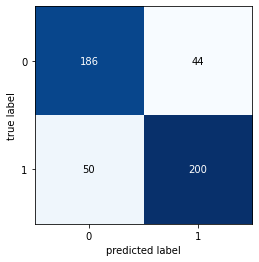

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       230
           1       0.82      0.80      0.81       250

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [110]:
# avaliando o modelo
mtx_confusion_forest_binary = confusion_matrix(y_test, y_pred_forest_binary)
fig, ax = plot_confusion_matrix(conf_mat = mtx_confusion_forest_binary)
plt.show()

print(classification_report(y_test, y_pred_forest_binary))